# CNN (Convolutional Neural Network)

### 0. Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Conv1D, Conv2D, MaxPool2D, MaxPool1D, Flatten, Input, Dense
from tensorflow.keras import optimizers
from tensorflow.keras.models import Model
from sklearn.datasets import fetch_openml

### 1. Load Data
 - fasion mnist data
    - 0 : T-shirt/top
    - 1 : Trouser
    - 2 : Pullover
    - 3 : Dress
    - 4 : Coat
    - 5 : Sandal
    - 6 : Shirt
    - 7 : Sneaker
    - 8 : Bag
    - 9 : Ankle boot

In [ ]:
mnist = fetch_openml('Fashion-MNIST')
mnist.data.shape, mnist.target.shape

((70000, 784), (70000,))

In [ ]:
mnist.data.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,119.0,114.0,130.0,76.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.0,96.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
mnist.target.unique()

['9', '0', '3', '2', '7', '5', '1', '6', '4', '8']
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [ ]:
X = mnist.data.to_numpy()
Y = mnist.target.astype('int8')

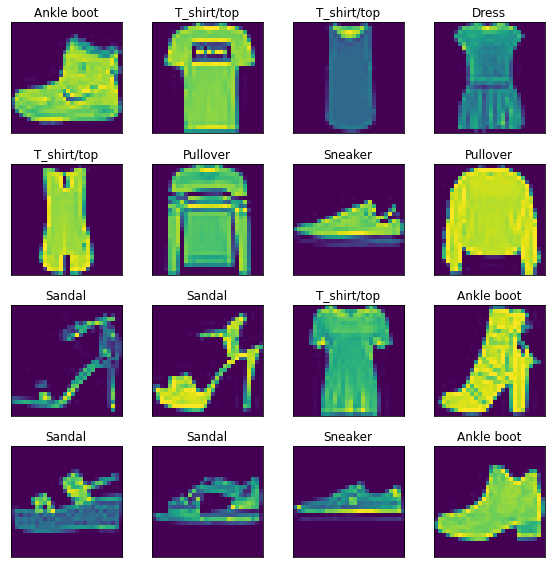

In [ ]:
class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(8, 8))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X[i].reshape((28,28)))
    label_index = int(Y[i])
    plt.title(class_names[label_index])
plt.tight_layout()
plt.show()

### 2. Data Preprocessing

In [ ]:
# Data Shaping
x_feat = mnist.data.to_numpy().reshape(-1, 28, 28) / 255
y_target = mnist.target.to_numpy().astype('int8').reshape(-1, 1)

In [ ]:
# Split into train, test data
x_train, x_test, y_train, y_test = train_test_split(x_feat, y_target, test_size=0.2)
x_train.shape, y_train.shape

((56000, 28, 28), (56000, 1))

### 3. CNN Model Implementation

 - tf Conv1D parameters
 - filters: filter 개수
 - kernel_size: kernel 사이즈
 - strides: stride 크기
 - paddins: "valid" means no padding. "same" results in padding with zeros evenly to the left/right or up/down of the input

In [ ]:
xInput = Input(batch_shape=(None, x_train.shape[1], x_train.shape[2]))

# (filters, kernel_size, strides=1, padding='valid', data_format='channels_last', dilation_rate=1, groups=1, activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros',
#  kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None, **kwargs)
# kernel size = 
hidden_conv1d = Conv1D(filters=10, kernel_size=5, strides=1, padding='valid', activation='relu')(xInput)
hidden_max1d = MaxPool1D(pool_size=2)(hidden_conv1d)

flat = Flatten()(hidden_max1d)
yOutput = Dense(10, activation='softmax')(flat)

model = Model(xInput, yOutput)
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam')

In [ ]:
hist = model.fit(x_train, y_train, batch_size=512, epochs=10)

Epoch 1/10
110/110 [==============================] - 2s 14ms/step - loss: 1.4596
Epoch 2/10
110/110 [==============================] - 1s 13ms/step - loss: 0.7166
Epoch 3/10
110/110 [==============================] - 2s 19ms/step - loss: 0.6045
Epoch 4/10
110/110 [==============================] - 2s 22ms/step - loss: 0.5530
Epoch 5/10
110/110 [==============================] - 2s 20ms/step - loss: 0.5230
Epoch 6/10
110/110 [==============================] - 3s 24ms/step - loss: 0.5042
Epoch 7/10
110/110 [==============================] - 2s 19ms/step - loss: 0.4899
Epoch 8/10
110/110 [==============================] - 3s 23ms/step - loss: 0.4799
Epoch 9/10
110/110 [==============================] - 3s 25ms/step - loss: 0.4695
Epoch 10/10
110/110 [==============================] - 1s 13ms/step - loss: 0.4628


In [ ]:
pred_val = model.predict(x_test)
pred = np.argmax(pred_val, axis=1).reshape(-1, 1)
print((pred == y_test).sum())

acc = (pred == y_test).mean()
print(acc.round(4))

11709
0.8364


In [ ]:
# xInput = Input(batch_shape=(None, x_feat.shape[1], x_feat.shape[2]))
# conv = Conv1D(filters=20, kernel_size=4, strides=1, padding='same', activation='relu')(xInput)
# pool = MaxPool1D(pool_size=2)(conv)
# flat = Flatten()(pool)
# yOutput = Dense(10, activation='softmax')(flat)

xInput = Input(batch_shape=(None, x_feat.shape[1], x_feat.shape[2], 1))
h_conv = Conv2D(filters=10, kernel_size=(5, 6), strides=1, padding='valid', activation='relu')(xInput)
h_pool = MaxPool2D(pool_size=(6, 5), strides=1, padding='valid')(h_conv)
h_flat = Flatten()(h_pool)
yOutput = Dense(10, activation='softmax')(h_flat)
# 19*17
model = Model(xInput, yOutput)
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizers.Adam(learning_rate=0.001))

In [ ]:
hist = model.fit(x_train, y_train, batch_size=1024, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
55/55 [==============================] - 1s 15ms/step - loss: 0.7881 - val_loss: 0.2555
Epoch 2/10
55/55 [==============================] - 0s 9ms/step - loss: 0.1841 - val_loss: 0.1470
Epoch 3/10
55/55 [==============================] - 1s 10ms/step - loss: 0.1225 - val_loss: 0.1208
Epoch 4/10
55/55 [==============================] - 0s 9ms/step - loss: 0.0966 - val_loss: 0.1006
Epoch 5/10
55/55 [==============================] - 1s 9ms/step - loss: 0.0822 - val_loss: 0.0818
Epoch 6/10
55/55 [==============================] - 0s 9ms/step - loss: 0.0725 - val_loss: 0.0776
Epoch 7/10
55/55 [==============================] - 0s 9ms/step - loss: 0.0659 - val_loss: 0.0699
Epoch 8/10
55/55 [==============================] - 0s 9ms/step - loss: 0.0600 - val_loss: 0.0634
Epoch 9/10
55/55 [==============================] - 0s 9ms/step - loss: 0.0562 - val_loss: 0.0627
Epoch 10/10
55/55 [==============================] - 0s 9ms/step - loss: 0.0505 - val_loss: 0.0602


In [ ]:
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 24, 23, 10)        310       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 19, 19, 10)       0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 3610)              0         
                                                                 
 dense_4 (Dense)             (None, 10)                36110     
                                                                 
Total params: 36,420
Trainable params: 36,420
Non-trainable params: 0
_______________________________________________________

In [ ]:
y_prob = model.predict(x_test)
y_pred = np.argmax(y_prob, axis=1).reshape(-1, 1)
# y_pred[:10]
acc = (y_pred == y_test).mean()
print(acc.round(4))

0.9824
